# 데이터시각화 연습문제 1 - Matplotlib
#### 문제 1
다음 데이터는 2021년 06월 01일부터 2023년 06월 30일까지의 비트코인 시세 데이터의 일부이다.
https://data.hossam.kr/D01/bitcoin.xlsx

이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을 10일 간격으로 설정하여 구현하시오.


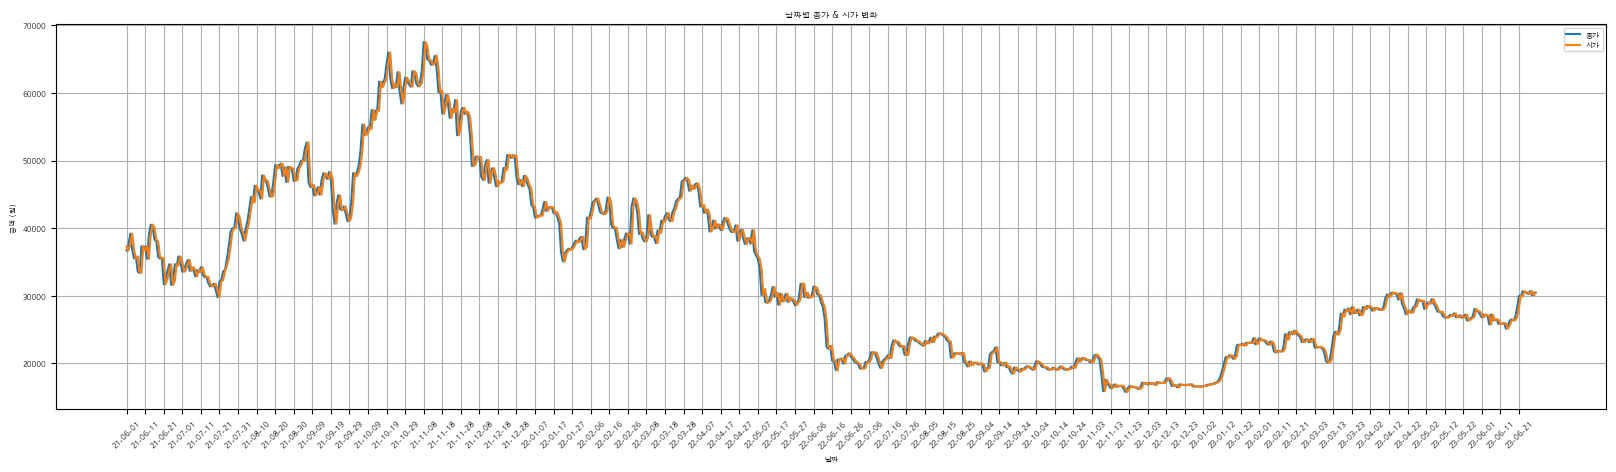

In [22]:
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

data = read_excel('https://data.hossam.kr/D01/bitcoin.xlsx')

날짜전체 = list(range(0, len(data['날짜'])))
xticks = list(range(0, len(data['날짜']), 10))
날짜list = []
for a in xticks:
    날짜list.append((data['날짜'][a]).strftime('%y-%m-%d'))
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 5  
plt.rcParams['figure.figsize']=(20, 5)
plt.rcParams['axes.unicode_minus'] = False   

plt.title('날짜별 종가 & 시가 변화')      
plt.xlabel("날짜")
plt.ylabel("금액 (원)")
plt.plot(날짜전체, data['종가'], label='종가')
plt.plot(날짜전체, data['시가'], label='시가')
plt.xticks(xticks, 날짜list, rotation = 45)
plt.legend(loc='upper right')
plt.grid()
plt.show()        
plt.close()     

#### 문제 2

다음 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 자료의 일부이다.

https://data.hossam.kr/D01/senior_lsf.xlsx

복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.

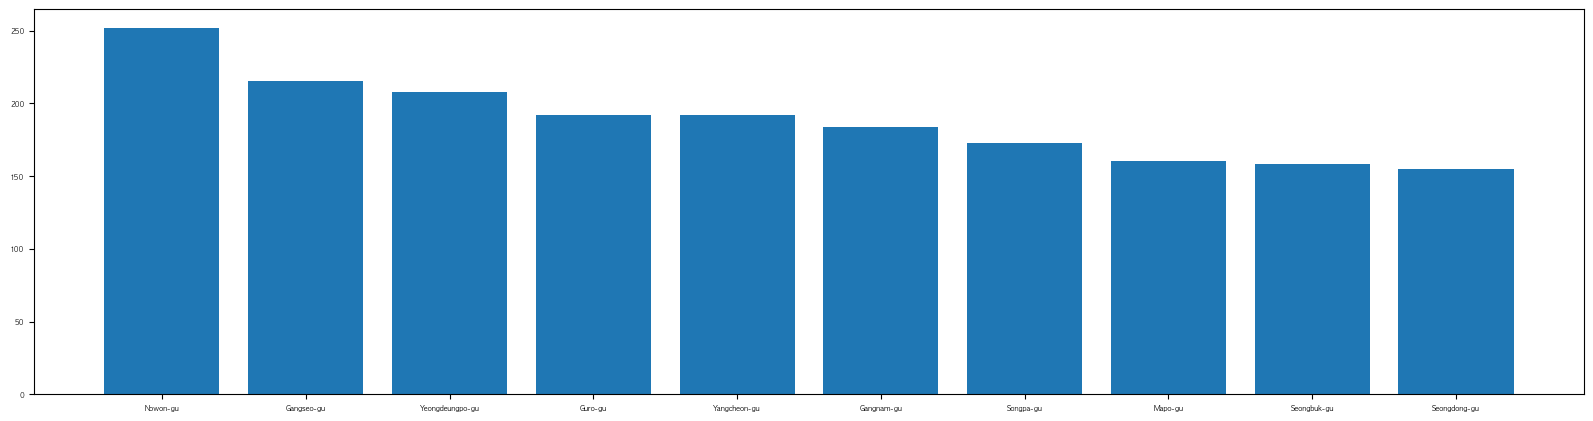

In [23]:
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

data = read_excel('https://data.hossam.kr/D01/senior_lsf.xlsx')

data2 = data.sort_values('복지시설', ascending = False).head(10)

plt.figure()
plt.bar(data2['지역명'], data2['복지시설'])
plt.show()
plt.close()

#### 문제 3

다음 데이터는 도시별 인구수를 5개년도 단위로 조사한 가상의 자료이다.

https://data.hossam.kr/D01/city_people.xlsx

각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다.



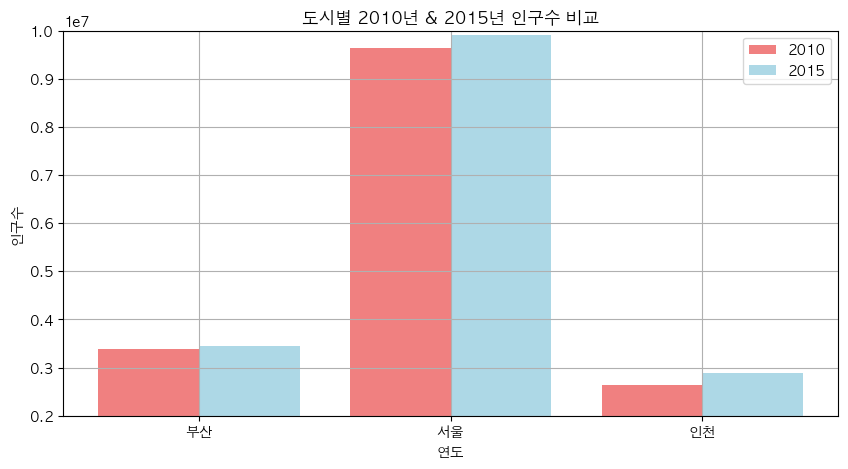

In [46]:
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame, pivot_table
import numpy as np

data = read_excel('https://data.hossam.kr/D01/city_people.xlsx')
df = DataFrame(data)
df2 = df.query('연도 == 2015 or 연도 == 2010')
df2
df3 = pivot_table(df2, 
                  index='도시', 
                  columns = '연도',
                  values = '인구')
df3

x = np.array(range(0, len(df3.index)))
x
plt.figure()
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False
plt.title('도시별 2010년 & 2015년 인구수 비교')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.bar(x-0.2, df3[2010], color = 'lightcoral', label = '2010', width = 0.4)
plt.bar(x+0.2, df3[2015], color = 'lightblue', label = '2015', width = 0.4)
plt.grid()
plt.legend(loc='upper right')
plt.xticks([0, 1, 2], df3.index)
plt.ylim(2000000, 10000000)
plt.show()        
plt.close() 

#### 문제 4

다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

이 데이터에 대해 아래의 요구사항을 충족하는 시각화 결과물을 구현하시오

- 요구사항 1: 종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.
- 요구사항 2: 종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

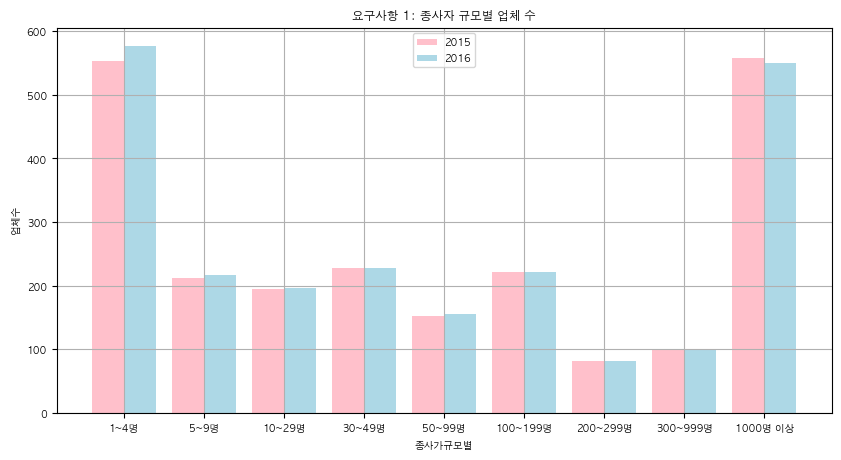

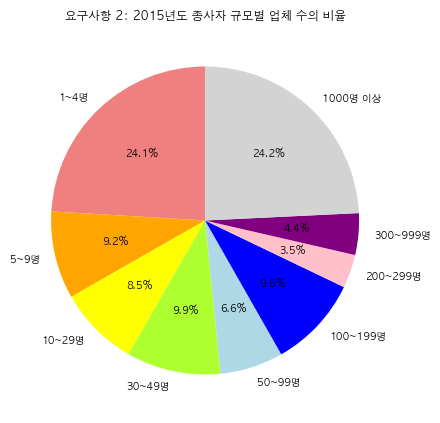

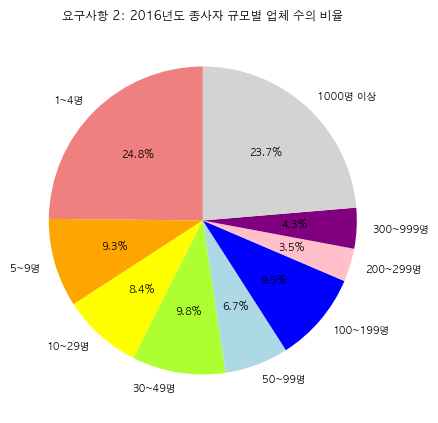

In [75]:
from matplotlib import pyplot as plt
from pandas import read_excel, pivot_table
import numpy as np

data = read_excel("https://data.hossam.kr/D01/jobs_by_scale.xlsx")
data
#------------------------
# 요구사항 1
#------------------------
# x축에 표시할 텍스트
xlabels = list(data['종사자규모별'])

# x축 좌표: 다중 막대 그래프의 경우 x축을 좌표값(숫자)를 원소르 갖는 numpy.array로 처리하는 것이 유리
x = np.array(range(0, len(xlabels)))

# y축 데이터
# data[2015]
# data[2016]

plt.figure()
plt.rcParams['font.size'] = 7
plt.title('요구사항 1: 종사자 규모별 업체 수')
plt.bar(x-0.2, data[2015], color = 'pink', label = '2015', width = 0.4)  
plt.bar(x+0.2, data[2016], color = 'lightblue', label = '2016', width = 0.4) 
plt.xlabel('종사가규모별')
plt.ylabel('업체수')
plt.legend()
plt.xticks(x, xlabels)
plt.grid()
plt.show()
plt.close()

#------------------------
# 요구사항 2
#------------------------

colors = ['lightcoral','orange','yellow','greenyellow','lightblue','blue','pink','purple', 'lightgray']

plt.figure()
plt.rcParams['font.size'] = 7
plt.title('요구사항 2: 2015년도 종사자 규모별 업체 수의 비율')
plt.pie(data[2015], labels=data['종사자규모별'], autopct = '%0.1f%%', colors = colors, startangle = 90)
plt.show()
plt.close()

colors = ['lightcoral','orange','yellow','greenyellow','lightblue','blue','pink','purple', 'lightgray']

plt.figure()
plt.rcParams['font.size'] = 7
plt.title('요구사항 2: 2016년도 종사자 규모별 업체 수의 비율')
plt.pie(data[2016], labels=data['종사자규모별'], autopct = '%0.1f%%', colors = colors, startangle = 90)
plt.show()
plt.close()

#### 문제 5

아래의 데이터는 2002년도부터 2018년도까지 월별 교통사고의 발생건수, 사망자수, 부상자수를 조사한 데이터의 일부이다.
https://data.hossam.kr/D01/traffic_acc.xlsx

교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.

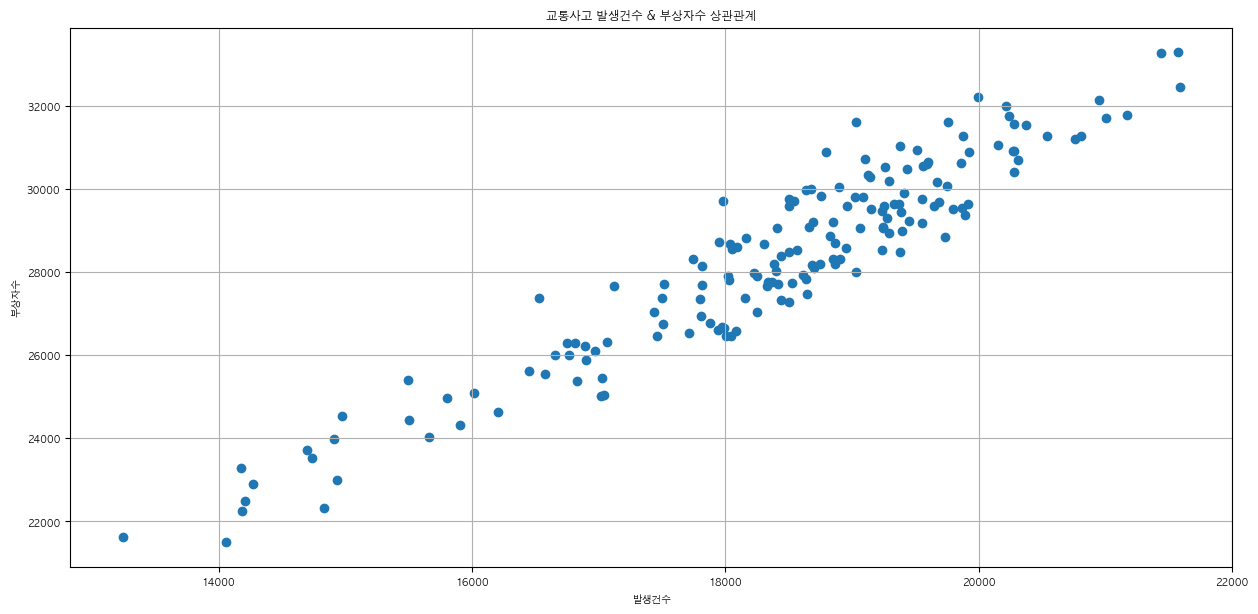

In [85]:
from matplotlib import pyplot as plt
from pandas import read_excel

data = read_excel("https://data.hossam.kr/D01/traffic_acc.xlsx")
data

plt.figure()
plt.title('교통사고 발생건수 & 부상자수 상관관계')
plt.scatter(data['발생건수'], data['부상자수'])
plt.xlabel('발생건수')
plt.ylabel('부상자수')
plt.grid()
plt.show()
plt.close()

### 추가내용
- Numpy를 활용한 추세선 구하기 (회귀분석)
- `numpy.polyfit(x값, y값, 1)

기울기(가중치) = 1.4044180973028613
절편(편향) =  2495.338546755983
f(x) = 1.404418 * x + 2495.338547


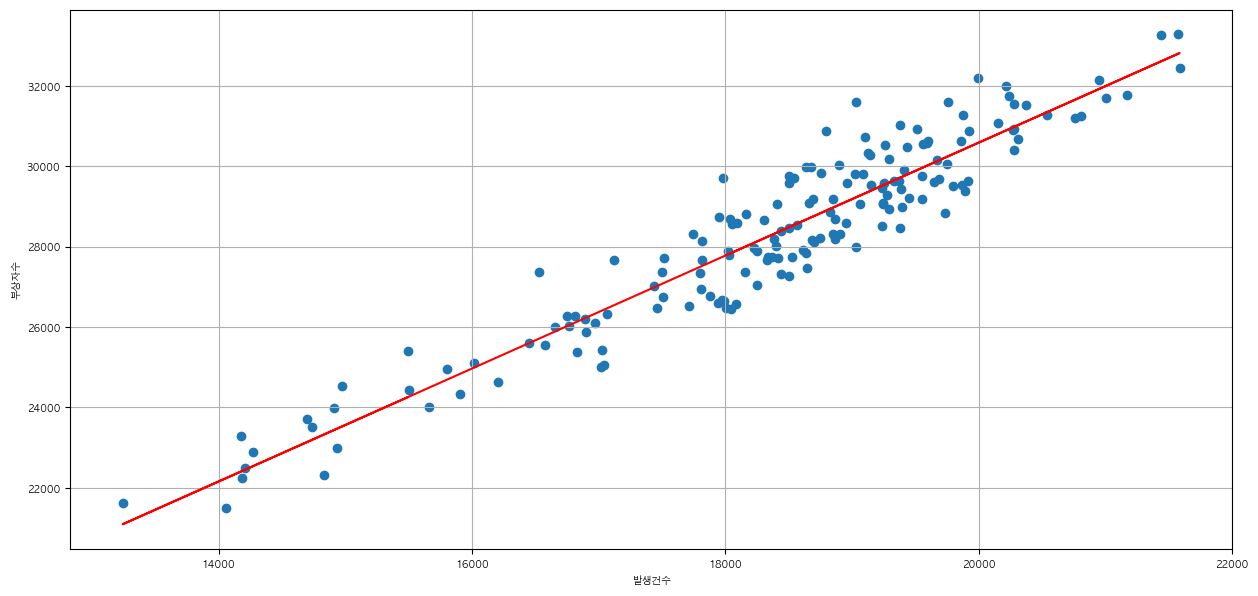

In [98]:
from pandas import read_excel
import numpy as np

data = read_excel("https://data.hossam.kr/D01/traffic_acc.xlsx")
data

z = np.polyfit(data['발생건수'], data['부상자수'], 1)
print("기울기(가중치) =", z[0])
print("절편(편향) = ", z[1])

# 발생건수에 대한 부상자수 예측
print('f(x) = %f * x + %f' % (z[0], z[1]))
f = np.poly1d(z)
f(data['발생건수'])

# 추세선 포함 그래프 그리기
plt.figure()
plt.scatter(data['발생건수'], data['부상자수'])
plt.plot(data['발생건수'], f(data['발생건수']), color='red')
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()
